Overcoming Class Imbalance using SMOTE Techniques

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

- 程式
https://github.com/Swastik-25/Imbalanced-Data-with-SMOTE-Techniques/blob/main/Imbalanced_Data.ipynb

- 資料集
https://github.com/Swastik-25/Imbalanced-Data-with-SMOTE-Techniques/blob/main/churn_prediction.csv

# 安裝

In [1]:
!sudo pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [4]:
df = pd.read_csv("./churn_prediction.csv")
df.shape

(28382, 21)

In [5]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

# Data Preprocessing

In [6]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [7]:
# a) Missing Value Treatment

#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

# Replace with -1 for missing gender
df['gender'] = df['gender'].fillna(-1)

# Replacing with max. occurence values
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')
df['city'] = df['city'].fillna(1020)

In [8]:
# b) Dummy variables
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [9]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,2101,66,1.0,0.0,self_employed,187.0,2,755,1458.71,...,0.20,1458.71,1458.71,0,2019-05-21,0,0,0,1,0
1,2,2348,35,1.0,0.0,self_employed,1020.0,2,3214,5390.37,...,100.56,6496.78,8787.61,0,2019-11-01,0,0,0,1,0
2,4,2194,31,1.0,0.0,salaried,146.0,2,41,3913.16,...,259.23,5006.28,5070.14,0,NaT,0,0,1,0,0
3,5,2329,90,-1.0,0.0,self_employed,1020.0,2,582,2291.91,...,2143.33,2291.91,1669.79,1,2019-08-06,0,0,0,1,0
4,6,1579,42,1.0,2.0,self_employed,1494.0,3,388,927.72,...,1538.06,1157.15,1677.16,1,2019-11-03,0,0,0,1,0


In [10]:
#x = df.drop('Attrition', axis=1)
x = df.drop(['churn','customer_id', 'occupation', 'last_transaction'], axis=1)
y = df['churn']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [11]:
y_train.shape, y_test.shape

((22705,), (5677,))

In [12]:
y_train.value_counts()/len(y_train)

0    0.814666
1    0.185334
Name: churn, dtype: float64

In [13]:
y_test.value_counts()/len(y_test)

0    0.814691
1    0.185309
Name: churn, dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

Handling class imbalance using SMOTE based techniques

In [15]:
# A) SMOTE Technique
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 18497})


In [16]:
# B) ADASYN Technique
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 17388})


In [17]:
# C) Hybrid Techniques
# C.1) SMOTE + Tomek Links

from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18090, 1: 18090})


In [18]:
# C.2) SMOTE + ENN
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({1: 14641, 0: 8958})


In [19]:
# Model Building - Imbalanced data
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [20]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [21]:
# Model-1: Logistic Regression
# 1. Original Unsampled Data

log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression(C=10.0)

In [22]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[4596   29]
 [ 966   86]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4625
           1       0.75      0.08      0.15      1052

    accuracy                           0.82      5677
   macro avg       0.79      0.54      0.52      5677
weighted avg       0.81      0.82      0.76      5677
 

AUC-ROC
0.773437467886137


In [23]:
# 2.SMOTE Resampling
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression(C=10.0)

In [24]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[3715  910]
 [ 335  717]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4625
           1       0.44      0.68      0.54      1052

    accuracy                           0.78      5677
   macro avg       0.68      0.74      0.70      5677
weighted avg       0.83      0.78      0.80      5677
 

AUC-ROC
0.7773704655225568


In [25]:
# 3.ADASYN Resampling

clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression(C=10.0)

In [26]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[3914  711]
 [ 360  692]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4625
           1       0.49      0.66      0.56      1052

    accuracy                           0.81      5677
   macro avg       0.70      0.75      0.72      5677
weighted avg       0.84      0.81      0.82      5677
 

AUC-ROC
0.7786474154763128


In [27]:
# 4.SMOTE + Tomek Resampling
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression(C=10.0)

In [28]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

Confusion Matrix
[[3735  890]
 [ 335  717]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4625
           1       0.45      0.68      0.54      1052

    accuracy                           0.78      5677
   macro avg       0.68      0.74      0.70      5677
weighted avg       0.83      0.78      0.80      5677
 

AUC-ROC
0.7783409721508581


In [29]:
# 5.SMOTE + ENN Resampling
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

LogisticRegression(C=10.0, class_weight='balanced')

In [30]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

Confusion Matrix
[[3733  892]
 [ 337  715]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4625
           1       0.44      0.68      0.54      1052

    accuracy                           0.78      5677
   macro avg       0.68      0.74      0.70      5677
weighted avg       0.83      0.78      0.80      5677
 

AUC-ROC
0.7832722227931354


In [31]:
# Model-2: Decision Tree
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [32]:
# 1. Original Unsampled Data
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=100)

In [33]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[4387  238]
 [ 594  458]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4625
           1       0.66      0.44      0.52      1052

    accuracy                           0.85      5677
   macro avg       0.77      0.69      0.72      5677
weighted avg       0.84      0.85      0.84      5677
 

AUC-ROC
0.7960387421642175


In [34]:
# 2.SMOTE Resampling
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=100)

In [35]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[3579 1046]
 [ 361  691]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4625
           1       0.40      0.66      0.50      1052

    accuracy                           0.75      5677
   macro avg       0.65      0.72      0.67      5677
weighted avg       0.81      0.75      0.77      5677
 

AUC-ROC
0.7700580618641456


In [36]:
# 3.ADASYN Resampling
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=50)

In [37]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[3642  983]
 [ 393  659]] 

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      4625
           1       0.40      0.63      0.49      1052

    accuracy                           0.76      5677
   macro avg       0.65      0.71      0.67      5677
weighted avg       0.81      0.76      0.78      5677
 

AUC-ROC
0.7696510122289592


In [38]:
# 4. SMOTE + Tomek Resampling
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=7)

In [39]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

Confusion Matrix
[[3542 1083]
 [ 344  708]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      4625
           1       0.40      0.67      0.50      1052

    accuracy                           0.75      5677
   macro avg       0.65      0.72      0.67      5677
weighted avg       0.82      0.75      0.77      5677
 

AUC-ROC
0.7811483917377452


In [40]:
# 5.SMOTE + ENN Resampling
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_split=100)

In [41]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

Confusion Matrix
[[3134 1491]
 [ 271  781]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      4625
           1       0.34      0.74      0.47      1052

    accuracy                           0.69      5677
   macro avg       0.63      0.71      0.63      5677
weighted avg       0.81      0.69      0.72      5677
 

AUC-ROC
0.7677527489466653


In [42]:
# Model-3: Random Forest
# 1. Original Unsampled Data
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=20)

In [43]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[4459  166]
 [ 587  465]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4625
           1       0.74      0.44      0.55      1052

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.74      5677
weighted avg       0.86      0.87      0.85      5677
 

AUC-ROC
0.8322295755831879


In [44]:
# 2.SMOTE Resampling
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=50)

In [45]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[3789  836]
 [ 348  704]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      4625
           1       0.46      0.67      0.54      1052

    accuracy                           0.79      5677
   macro avg       0.69      0.74      0.70      5677
weighted avg       0.83      0.79      0.81      5677
 

AUC-ROC
0.8078265337580928


In [46]:
# 3.ADASYN Resampling
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=50)

In [47]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[3817  808]
 [ 360  692]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4625
           1       0.46      0.66      0.54      1052

    accuracy                           0.79      5677
   macro avg       0.69      0.74      0.70      5677
weighted avg       0.83      0.79      0.81      5677
 

AUC-ROC
0.8070551844620286


In [48]:
# 4. SMOTE + Tomek Resampling
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=50)

In [49]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

Confusion Matrix
[[3800  825]
 [ 359  693]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.82      0.87      4625
           1       0.46      0.66      0.54      1052

    accuracy                           0.79      5677
   macro avg       0.69      0.74      0.70      5677
weighted avg       0.83      0.79      0.80      5677
 

AUC-ROC
0.8072539307368204


In [50]:
# 5. SMOTE + ENN Resampling
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=10)

In [51]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

Confusion Matrix
[[3254 1371]
 [ 258  794]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      4625
           1       0.37      0.75      0.49      1052

    accuracy                           0.71      5677
   macro avg       0.65      0.73      0.65      5677
weighted avg       0.82      0.71      0.74      5677
 

AUC-ROC
0.8026552255677731


In [52]:
# Model Comparision
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.747826,0.081749,0.147386,0.773437
1,Logistic Regression,smote,0.440688,0.681559,0.535274,0.777370
2,Logistic Regression,adasyn,0.493229,0.657795,0.563747,0.778647
3,Logistic Regression,smote+tomek,0.446173,0.681559,0.539300,0.778341
4,Logistic Regression,smote+enn,0.444928,0.679658,0.537796,0.783272
5,Decision Tree,actual,0.658046,0.435361,0.524027,0.796039
6,Decision Tree,smote,0.397812,0.656844,0.495518,0.770058
7,Decision Tree,adasyn,0.401340,0.626426,0.489235,0.769651
8,Decision Tree,smote+tomek,0.395310,0.673004,0.498065,0.781148
9,Decision Tree,smote+enn,0.343750,0.742395,0.469916,0.767753


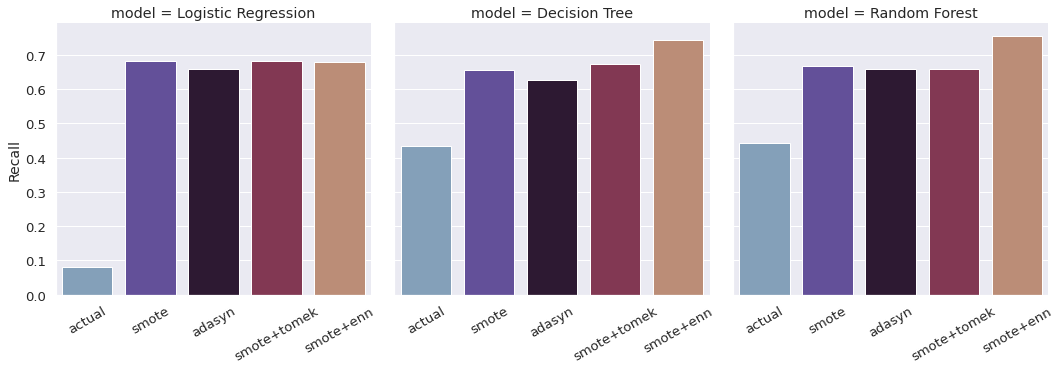

In [53]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)